# Main Notebook
### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import sys
from datetime import datetime
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset
import torchvision.utils as vutils
import json
import PIL

In [2]:
sys.path.insert(1,'util')
#imported from utils
from loaders import generateDatasets, inOut#, saveJSON, loadJSON#, MyData
from NNets import SimpleClas, SimpleDisc, SimpleGen, Reshape
# from tools import accuracy, tools, per_image_error, predVsTarget
from plotter import myPlots

#improted from train.py
from train import train

Checks if cuda is available

In [3]:
torch.cuda.is_available()

True

## Init

In [4]:
#Path where data is stored
data_path = 'data'

#These are diffrent parameters for the machine learnign algorithm
dir = str(0)
BATCH_SIZE=100
NUM_WORKERS=1 #Can be 8 for faster more capable computers but try 1 if 8 doesn't work
ngpu = 1 
lr = 0.0001
latentSpace=100
lam=1
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

In [23]:
#dict = inOut().newDict(data_path,dir)
dictFilename = os.listdir(os.path.join(data_path, "Dict", dir))[0]
dict = inOut().loadDict(os.path.join(data_path, "Dict", dir, dictFilename))
dict['BatchSize'] = BATCH_SIZE
dict['NumWorkers'] = NUM_WORKERS
dict['ngpu'] = ngpu
dict['lr'] = lr
dict['LS']=latentSpace
dict

{'Class': [],
 'Gen': [],
 'Disc': [],
 'Path': ['dataDict/0/Dict-2022-05-23-09-30.json'],
 'PathRoot': ['data'],
 'Dir': '0',
 'BatchSize': 100,
 'NumWorkers': 1,
 'ngpu': 1,
 'lr': 0.0001,
 'LS': 100}

## Training the GAN
This code works by using the train.py file

Train the GAN

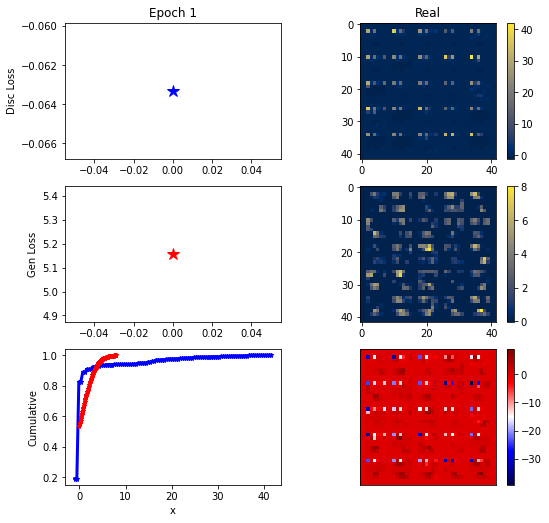

ErrG: 5.157704874873161, ErrReg: 5.475572392344475


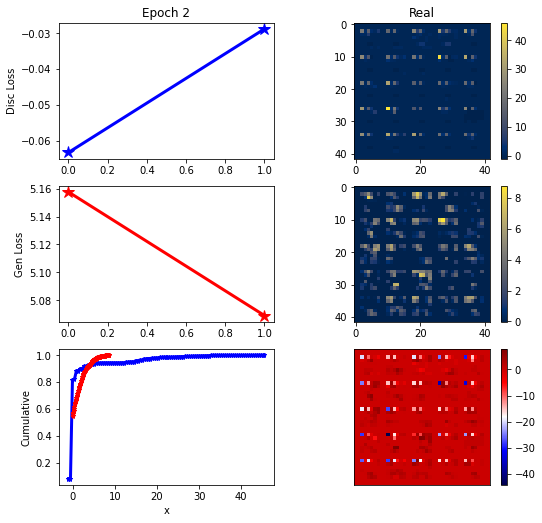

ErrG: 5.068903982639313, ErrReg: 5.429107487201691


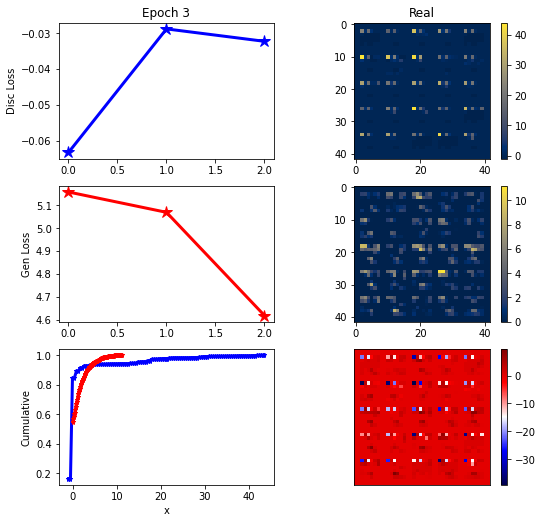

ErrG: 4.618122220039368, ErrReg: 4.986666053533554


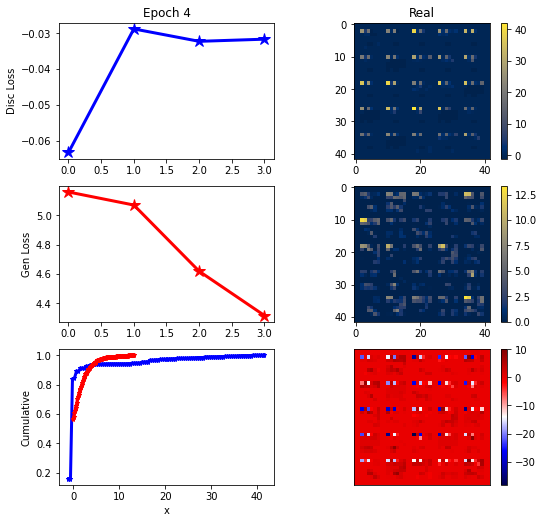

ErrG: 4.316469758749008, ErrReg: 4.6933228969573975


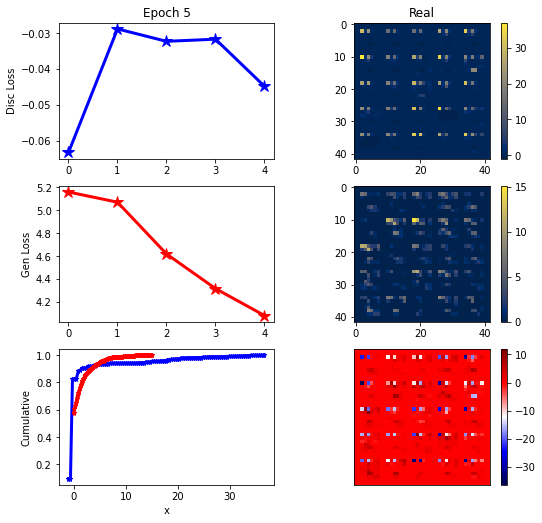

ErrG: 4.081870824098587, ErrReg: 4.4547231793403625
Done!!


In [15]:
error_list_D, error_list_G  = train(dict, latentSpace=100, s=6, lam=lam).trainWGANs(device, 5,25)

Continue training the GAN

In [26]:
error_list_D, error_list_G  = train(dict, latentSpace=100, s=6, lam=dict['lambda']).continuetrainWGANs(device, 1000,25)

KeyError: 0

In [ ]:
#Load network
# clas = MLP().to(device)

#Loss
# criterion = nn.NLLLoss()
# opt = optim.Adam(clas.parameters(), lr=lr)

#TRAIN CLASS
# error_list, acc, accTrain = train().trainClass(100,25)

#TRAIN GANs
# error_list_D, error_list_G  = train().trainGANs(100,25, ngpu=1)

error_list_D, error_list_G  = train(s=6, lam=0.001).trainWGANs(2000,25)

# error_list_D, error_list_G  = train().trainWGANs_GP(100,25)
# error_list_D, error_list_G  = train().trainWGANs_GPandUnroll(100,25)

error_list_D, error_list_G  = train(s=6).continuetrainWGANs(1000,25)

## Generate Synth Data

In [ ]:
@torch.no_grad()
def genSynData(rows=10):
    ar = Reshape(36)(g(torch.randn(rows,100).to(device))).detach().cpu().numpy()
    df = pd.read_csv("kag_risk_factors_cervical_cancer.csv")
    dfSyn = pd.DataFrame(ar, columns = df.columns)
    for column in dfSyn.columns:
        dfSyn[column] = dfSyn[column].apply(lambda x: np.ceil(x)).astype(int)
    return dfSyn

_,_,g = inOut().load_model('Gen', dict, device)
g.eval();

In [ ]:
dfSyn = genSynData(rows=5000)
dfSyn.head()

In [ ]:
dfSyn.to_csv("synData10.csv", index=False)

In [ ]:
dfTemp = pd.read_csv("synData10.csv")
dfTemp.shape